In [1]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

<Figure size 640x480 with 0 Axes>

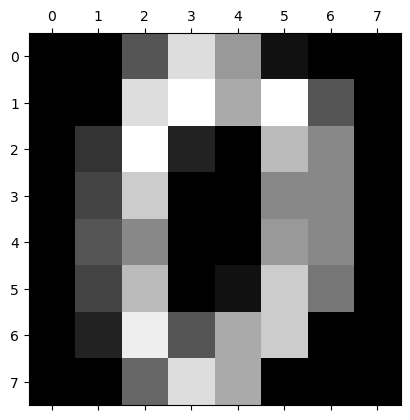

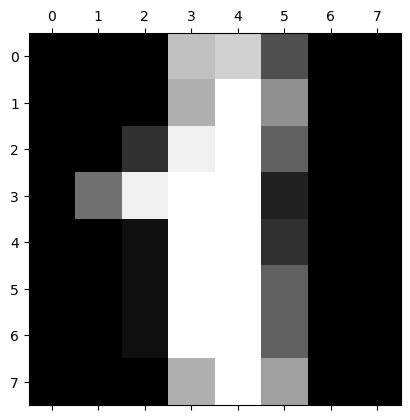

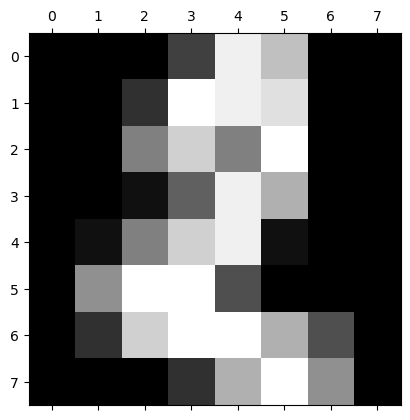

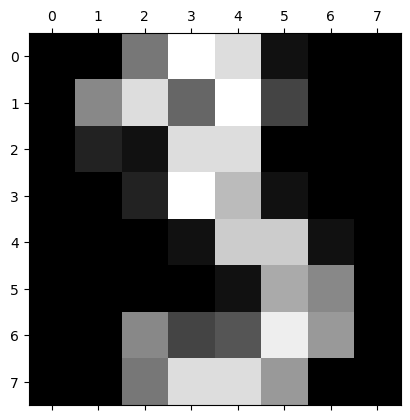

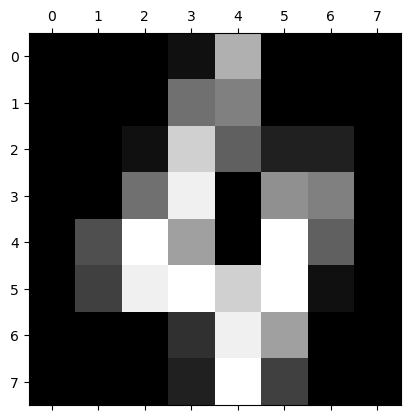

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray()

for i in range(5):
    plt.matshow(digits.images[i])

In [3]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
df['target'] = digits.target

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df.target, test_size=0.2)

In [17]:
len(X_train)

1437

In [18]:
len(X_test)

360

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [20]:
model.score(X_test, y_test)

0.9666666666666667

In [21]:
y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 24,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  1, 32]], dtype=int64)

Text(158.22222222222223, 0.5, 'Truth')

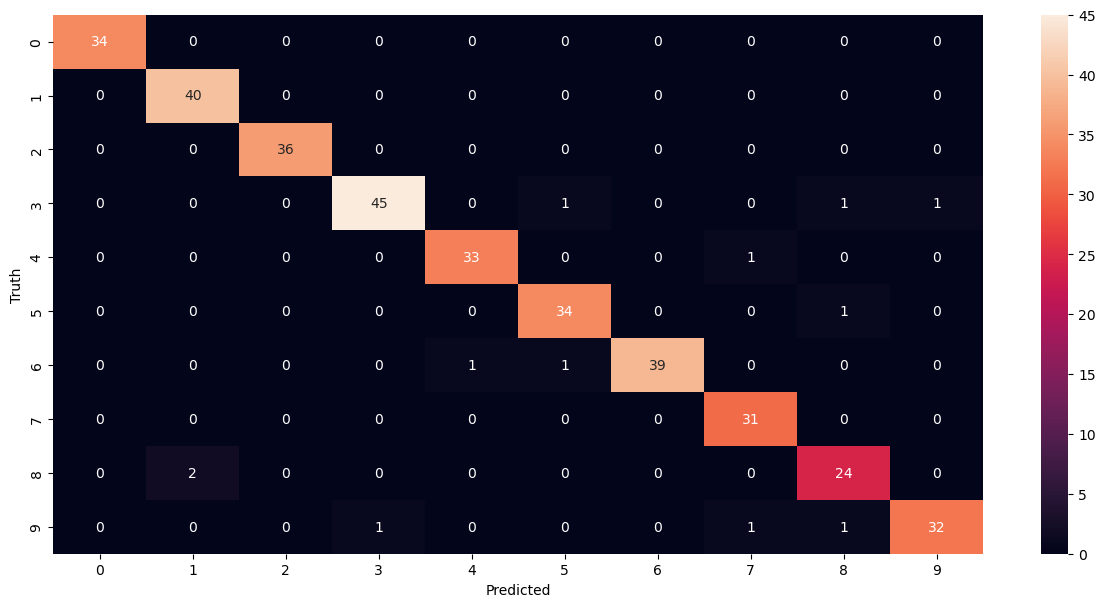

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")